<a href="https://colab.research.google.com/github/yioqse/Testeo1/blob/main/FiltrosBordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install opencv-python matplotlib

In [3]:
# librerías para visualización y procesamiento de imágenes
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [65]:
def abrir_imagen_gris(img_file: str, img_name:str = None) -> np.array:
    """
    Abre una imagen desde fichero o desde url.
    :param file: str con la ruta o url de la imagen
    :param img_name: str con el nombre y extensión para guardar la imagen
    :return: un array con la imagen en escala de grises
    """
    # para detectar origen del archivo
    import re
    # comprueba si es un url revisando si empieza por https
    if bool(re.search("\Ahttps", img_file)) == True:
        import requests
        response = requests.get(img_file)
        if response.status_code == 200:
            # se guarda imagen en array
            img_array = np.frombuffer(response.content, np.uint8)
            img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
            # si se da un nombre (y ruta) en img_name, se guarda la imagen
            if img_name is not None:
                with open(img_name, "wb") as f:
                    f.write(response.content) # se guarda original web
        else:
            img = None
            print(f'Error en url {response.status_code}')
    else:
        try:
            # abre el archivo de imagen directamente desde el path
            img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        except Exception as TypeError:
            print(f"No se pudo cargar la imagen.\n{TypeError}")

    # la imagen entra con escala invertida, esto lo rectifica
#    if img is not None:
#        img = cv2.bitwise_not(img)

    return img

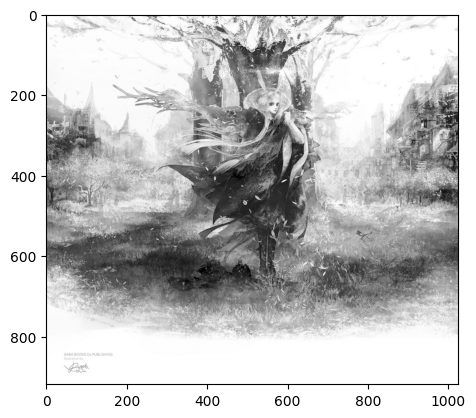

In [66]:
# desde url, sin descargar imagen
img_url: str = 'https://64.media.tumblr.com/tumblr_lm6blyraFW1qkm22do1_1280.jpg'
img = abrir_imagen_gris(img_file = img_url,
                        #img_name = 'sakura_rain.jpg'
                        )
plt.imshow(img, cmap = 'gray')

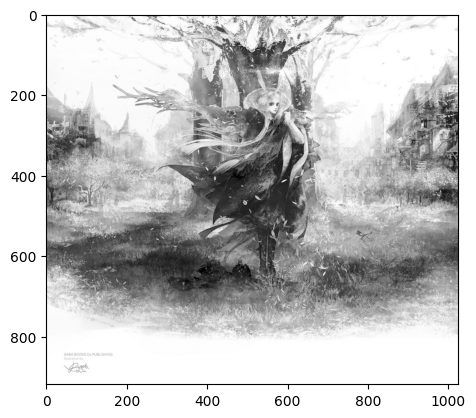

In [67]:
# desde archivos
img_file = "C:/Users/visionado/Desktop/tumblr_lm6blyraFW1qkm22do1_1280.jpg"
img = abrir_imagen_gris(img_file = img_file)
plt.imshow(img, cmap = 'gray')

## Detectores de Bordes

| Detector | Tipo | Características | Ventajas | Desventajas | Uso Típico |
|----------|------|-----------------|----------|-------------|------------|
| **Canny** | Bordes | - Detección óptima de bordes<br>- Algoritmo de 3 etapas<br>- Supresión de no-máximos<br>- Umbralización por histéresis | - Muy buena precisión<br>- Bordes delgados y continuos<br>- Reduce el ruido | - Más lento computacionalmente<br>- Muchos parámetros para ajustar | Detección precisa de contornos, segmentación de objetos |
| **Sobel** | Bordes | - Operador de convolución 3x3<br>- Calcula gradientes en X e Y<br>- Enfatiza bordes horizontales y verticales | - Rápido y simple<br>- Buena respuesta a bordes fuertes<br>- Menos sensible al ruido que otros | - Bordes más gruesos<br>- Menos preciso en esquinas | Detección rápida de bordes, preprocessing |
| **Scharr** | Bordes | - Mejora del operador Sobel<br>- Kernels optimizados<br>- Mejor respuesta isotrópica | - Mejor precisión que Sobel<br>- Menos artefactos direccionales | - Ligeramente más costoso que Sobel | Detección de bordes con mejor precisión angular |
| **Laplace** | Bordes | - Operador de segunda derivada<br>- Detecta cambios de intensidad<br>- Isotrópico (sin dirección preferida) | - Muy sensible a bordes<br>- Invariante a rotación | - Muy sensible al ruido<br>- Produce bordes dobles | Detección de bordes finos, realce de características |
| **Prewitt** | Bordes | - Similar a Sobel<br>- Kernels 3x3 simples<br>- Enfoque en gradientes | - Muy rápido<br>- Fácil implementación | - Menos preciso que Sobel<br>- Más sensible al ruido | Aplicaciones en tiempo real, detección básica |
| **Roberts** | Bordes | - Kernels 2x2<br>- Operador de gradiente cruzado<br>- Muy simple | - Extremadamente rápido<br>- Mínimo costo computacional | - Muy sensible al ruido<br>- Bordes muy discontinuos | Detección rápida en imágenes simples |

mirar este codigo que muestra la forma precisa de trabajar algunos metodos de deteccion (Sobel, Prewitts, Laplace, Canny):

https://nikatsanka.github.io/comparing-edge-detection-methods.html

sobre forma correcta de deteccion Sobel y Canny con openCV:

https://learnopencv.com/edge-detection-using-opencv/

In [56]:
def prewitt_edge_detection(img: np.array) -> np.array:
    # Prewitt kernels
    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])

    prewitt_y = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]])

    # Apply filters
    edges_x = cv2.filter2D(img, -1, prewitt_x)
    edges_y = cv2.filter2D(img, -1, prewitt_y)

    # Combine both directions
    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(edges)

    return edges

In [57]:
def roberts_edge_detection(img: np.array) -> np.array:
    # Roberts kernels
    roberts_x = np.array([[1, 0],
                          [0, -1]])

    roberts_y = np.array([[0, 1],
                          [-1, 0]])

    # Apply filters
    edges_x = cv2.filter2D(img, -1, roberts_x)
    edges_y = cv2.filter2D(img, -1, roberts_y)

    # Combine both directions
    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(edges)

    return edges

In [63]:
def deteccion_bordes(image: np.array) -> None:
    """
    Muestra distintos métodos de detección de bordes dentro de una misma imagen
    :param image: array con la imagen en escala de grises
    """
    # detector de bordes Canny
    canny_edges = cv2.Canny(image, 100, 200)  # Los umbrales pueden ajustarse
    # detector de bordes Sobel en X y Y y combinarlos (gradientes horizontal y vertical)
    # funciona mejor con los canales separados (agregar al código)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5) # gradiente horizontal
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5) # gradiene vertical
    sobel_edges = np.sqrt(sobelx ** 2 + sobely ** 2)
    # detector de bordes Scharr en X y Y y combinarlos
    scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    scharr_edges = np.sqrt(scharrx ** 2 + scharry ** 2)
    # detector de bordes Laplace
    laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)
    # detector de bordes Prewitts
    prewitt_edges = prewitt_edge_detection(img = image)
    # detector de bordes Roberts
    roberts_edges = roberts_edge_detection(img = image)

    # plot de detección
    fig, ax = plt.subplots(3, 3, figsize=(12, 8))

    ax[0,0].axis('off'), ax[0,2].axis('off')
    ax[0,1].imshow(image, cmap='gray')
    ax[0,1].set_title('Imagen Original (gris)'), ax[0,1].axis('off')

    ax[1,0].imshow(canny_edges, cmap='gray')
    ax[1,0].set_title('Detector Canny'), ax[1,0].axis('off')

    ax[1,1].imshow(sobel_edges, cmap='gray')
    ax[1,1].set_title('Detector Sobel'), ax[1,1].axis('off')

    ax[1,2].imshow(scharr_edges, cmap='gray')
    ax[1,2].set_title('Detector Scharr'), ax[1,2].axis('off')

    ax[2,0].imshow(laplacian_edges, cmap='gray')
    ax[2,0].set_title('Detector Laplace'), ax[2,0].axis('off')

    ax[2,1].imshow(prewitt_edges, cmap='gray')
    ax[2,1].set_title('Detector Prewitts'), ax[2,1].axis('off')

    ax[2,2].imshow(roberts_edges, cmap='gray')
    ax[2,2].set_title('Detector Roberts'), ax[2,2].axis('off')

    plt.tight_layout()
    plt.show()

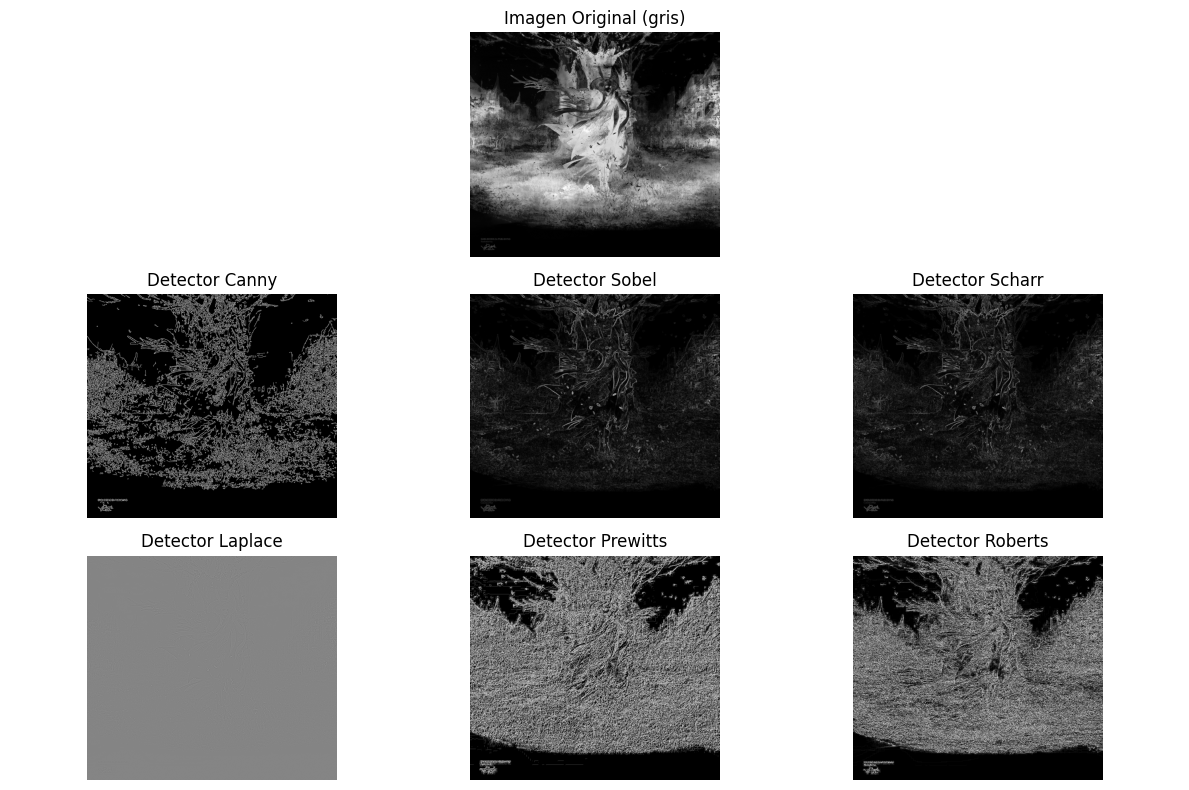

In [64]:
deteccion_bordes(image = img)

## Detección de Esquinas

## Detección de Texturas